# Soal nomor 3, 2502041956 - Nicholas Javier - LA05
# Link Video : https://www.youtube.com/watch?v=yF9EqOwTXt0

3. [LO1, LO2, LO3] [25%] Anda memiliki suatu suatu set text (data.3-.txt) yang ingin anda simpulkan
dengan bantuan algoritma. Lakukanlah pemodelan text summarization dengan pendekatan extractive
dengan menggunakan top 3 and 5 scores untuk masing-masing data. Lakukan evaluasi dengan
menggunakan ROUGE score dan jelaskan analisa terhadap hasil summarization yang anda peroleh
dan jelaskan pendapat anda mengenai summary yang dihasilkan

In [2]:
!pip install rouge-score matplotlib

import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize, word_tokenize
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import string

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=e821a33abfeb29c9eaeac968ca3efb63ecabfdd6598cbf6c89f995367b877fa2
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [3]:
nltk.download('punkt')
data_path = 'data_3C.csv'
df = pd.read_csv(data_path)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Unnamed: 0,content,summary
0,9,"TEMPO.CO, Jakarta -Buffer zone atau kawasan pe...",Presiden Joko Widodo mengungkapkan bahwa renca...
1,10,"TEMPO.CO, Jakarta - Menteri BUMN Erick Thohir,...","Setelah kebakaran Depo Pertamina, Presiden Jok..."
2,11,"TEMPO.CO, Jakarta - Peneliti Pusat Studi Hukum...",Peneliti meminta Komisi Yudisial menggali moti...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3 non-null      int64 
 1   content     3 non-null      object
 2   summary     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [5]:
df.describe()

,Unnamed: 0
count,3.0
mean,10.0
std,1.0
min,9.0
25%,9.5
50%,10.0
75%,10.5
max,11.0


In [6]:
df.head()

,Unnamed: 0,content,summary
0,9,"TEMPO.CO, Jakarta -Buffer zone atau kawasan pe...",Presiden Joko Widodo mengungkapkan bahwa renca...
1,10,"TEMPO.CO, Jakarta - Menteri BUMN Erick Thohir,...","Setelah kebakaran Depo Pertamina, Presiden Jok..."
2,11,"TEMPO.CO, Jakarta - Peneliti Pusat Studi Hukum...",Peneliti meminta Komisi Yudisial menggali moti...


In [7]:
missing_values = df.isnull().sum()
print("Missing values in each column:", missing_values)

Missing values in each column: Unnamed: 0    0
content       0
summary       0
dtype: int64



Text Length Statistics:
count       3.000000
mean     4256.333333
std      1179.549632
min      3155.000000
25%      3634.000000
50%      4113.000000
75%      4807.000000
max      5501.000000
Name: text_length, dtype: float64


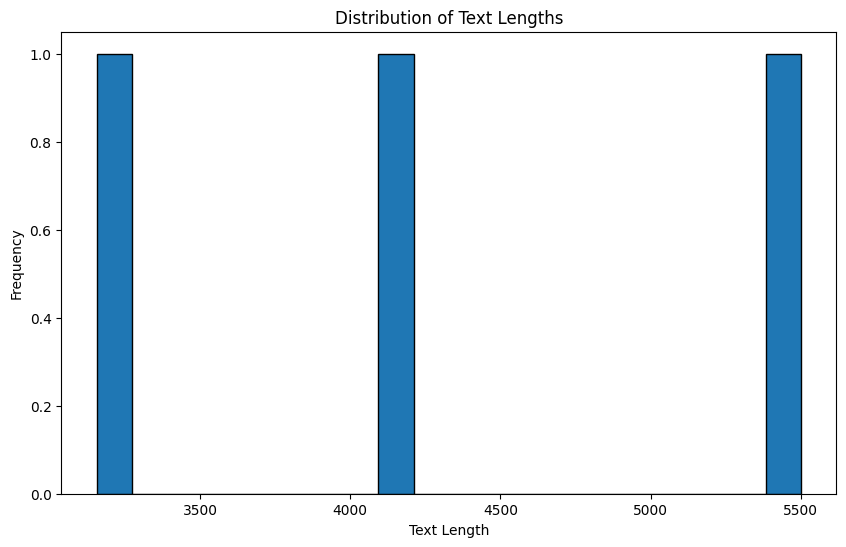

In [8]:
df['text_length'] = df['content'].apply(len)
print("\nText Length Statistics:")
print(df['text_length'].describe())

# Display the distribution of text lengths in the dataset
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=20, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('indonesian'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words and word not in punctuation]
    clean_text = ' '.join(filtered_tokens)
    return text

df['content'] = df['content'].apply(preprocess_text)
df['summary'] = df['summary'].apply(preprocess_text)

df.head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,content,summary,text_length
0,9,"TEMPO.CO, Jakarta -Buffer zone atau kawasan pe...",Presiden Joko Widodo mengungkapkan bahwa renca...,5501
1,10,"TEMPO.CO, Jakarta - Menteri BUMN Erick Thohir,...","Setelah kebakaran Depo Pertamina, Presiden Jok...",3155
2,11,"TEMPO.CO, Jakarta - Peneliti Pusat Studi Hukum...",Peneliti meminta Komisi Yudisial menggali moti...,4113


In [10]:
def extractive_summary_tfidf(text, num_sentences):
    sentences = sent_tokenize(text)
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

    sentence_scores = similarity_matrix.sum(axis=1)
    ranked_sentences = [sentences[i] for i in sentence_scores.argsort()[-num_sentences:][::-1]]

    return " ".join(ranked_sentences)

# Example usage to test the function
text_example = df['content'][1] # Use the processed text
summary_3 = extractive_summary_tfidf(text_example, 3)
summary_5 = extractive_summary_tfidf(text_example, 5)

Dengan menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency), fungsi extractive_summary_tfidf dimaksudkan untuk membuat rangkuman ekstraktif dari sebuah teks. Pertama, sent_tokenize digunakan untuk memecah teks menjadi beberapa kalimat berbeda. Matriks TF-IDF dari kalimat-kalimat tersebut kemudian dihitung dengan objek TfidfVectorizer. Matriks kesamaan kosinus (cosine_similarity) kemudian diambil dari matriks TF-IDF, dan skor untuk setiap kalimat dihitung berdasarkan jumlah kesamaannya dengan kalimat lainnya. Selanjutnya, kalimat diurutkan berdasarkan skornya. Untuk membentuk rangkuman, sejumlah kalimat dengan skor tertinggi dipilih sesuai dengan parameter num_sentences. Contoh teks dari kolom "content" dataframe df digunakan untuk menguji fungsi ini; hasilnya adalah rangkuman dengan 3 dan 5 kalimat.

In [11]:
summary_3

'"Iya," kata dia, di lokasi.Di lokasi ini, Jokowi telah memerintahkan Erick, Heru, dan Pertamina, mencari solusi usai kejadian kebakaran di Depo Pertamina Plumpang, Jakarta Utara. "Ini mau rapat di sana, ini rapat langsung," kata Erick usai menemani Jokowi yang mengunjungi para pengungsi kebakaran Depo Pertamina di RPTRA Rasela, Koja, Jakarta Utara, Ahad 5 Maret 2023.Jokowi datang bersama Erick, Heru yang juga Kepala Sekretariat Presiden, dan Nicke. "Ini akan segera diputuskan sehari dua hari ini oleh Pertamina, Gubernur DKI sehingga solusinya menjadi jelas," kata Jokowi.Ada dua opsiJokowi belum bisa memastikan apakah nanti warga masih bisa tinggal di lokasi, jika nanti yang akhirnya Depo Pertamina yang dipindah.'

In [12]:
summary_5

'"Iya," kata dia, di lokasi.Di lokasi ini, Jokowi telah memerintahkan Erick, Heru, dan Pertamina, mencari solusi usai kejadian kebakaran di Depo Pertamina Plumpang, Jakarta Utara. "Ini mau rapat di sana, ini rapat langsung," kata Erick usai menemani Jokowi yang mengunjungi para pengungsi kebakaran Depo Pertamina di RPTRA Rasela, Koja, Jakarta Utara, Ahad 5 Maret 2023.Jokowi datang bersama Erick, Heru yang juga Kepala Sekretariat Presiden, dan Nicke. "Ini akan segera diputuskan sehari dua hari ini oleh Pertamina, Gubernur DKI sehingga solusinya menjadi jelas," kata Jokowi.Ada dua opsiJokowi belum bisa memastikan apakah nanti warga masih bisa tinggal di lokasi, jika nanti yang akhirnya Depo Pertamina yang dipindah. Jokowi memerintahkan agar ada solusi dalam satu dua hari ini usai kebakaran di Depo Pertamina, apakah fasilitas penyimpanan bensin ini dipindah atau warga di sekitar di relokasi. Kalau digeser tanahnya di mana, tapi harus segera ditemukan solusinya," kata dia.Jokowi menyebut D

In [13]:
# Generate summaries for the entire dataset
df['summary_3'] = df['content'].apply(lambda x: extractive_summary_tfidf(x, 3))
df['summary_5'] = df['content'].apply(lambda x: extractive_summary_tfidf(x, 5))

# Display the first few summaries to verify
df[['content', 'summary_3', 'summary_5']]

,content,summary_3,summary_5
0,"TEMPO.CO, Jakarta -Buffer zone atau kawasan pe...",Tapi mereka faktanya ada di tempat ini sudah p...,Tapi mereka faktanya ada di tempat ini sudah p...
1,"TEMPO.CO, Jakarta - Menteri BUMN Erick Thohir,...","""Iya,"" kata dia, di lokasi.Di lokasi ini, Joko...","""Iya,"" kata dia, di lokasi.Di lokasi ini, Joko..."
2,"TEMPO.CO, Jakarta - Peneliti Pusat Studi Hukum...",Adapun Ketua Majelis Hakim yang menyidangkan g...,Adapun Ketua Majelis Hakim yang menyidangkan g...


In [16]:
from rouge_score import rouge_scorer

top_levels = [3, 5]

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def evaluate_summary(reference, hypothesis):
    scores = scorer.score(reference, hypothesis)
    return scores

for top in top_levels:
    col_name = f'rouge_scores_top{top}'
    summary_col = f'summary_{top}'
    df[col_name] = df.apply(lambda x: evaluate_summary(x['summary'], x[summary_col]), axis=1)

for top in top_levels:
    col_name = f'rouge_scores_top{top}'
    print(f"ROUGE Scores for Top {top} Sentences:")
    print(df[col_name])


ROUGE Scores for Top 3 Sentences:
0    {'rouge1': (0.18421052631578946, 0.52238805970...
1    {'rouge1': (0.26851851851851855, 0.51785714285...
2    {'rouge1': (0.16129032258064516, 0.33333333333...
Name: rouge_scores_top3, dtype: object
ROUGE Scores for Top 5 Sentences:
0    {'rouge1': (0.1647940074906367, 0.656716417910...
1    {'rouge1': (0.21794871794871795, 0.60714285714...
2    {'rouge1': (0.14832535885167464, 0.41333333333...
Name: rouge_scores_top5, dtype: object


Hasil menunjukkan skor ROUGE untuk rangkuman tiga dan lima kalimat teratas dari beberapa teks. Skor ROUGE dihitung dengan membandingkan n-gram, frasa, dan string antara rangkuman yang dihasilkan dan referensi untuk mengevaluasi kualitas rangkuman. Dalam kasus ini, skor ROUGE-1 menunjukkan rentang recall dari 0.161 hingga 0.268 dan rentang precision dari 0.333 hingga 0.522. Untuk lima kalimat teratas, rentang recall adalah 0.148 hingga 0.217 dan rentang precision adalah 0.413 hingga 0.656. Rangkuman lima kalimat cenderung lebih sering diingat tetapi lebih tepat daripada rangkuman tiga kalimat, yang menunjukkan bahwa rangkuman lima kalimat memiliki relevansi yang lebih beragam tetapi cakupan yang lebih luas.

In [19]:
import pandas as pd
from collections import defaultdict

def average_rouge_scores(scores):
    avg_scores = defaultdict(lambda: {'precision': 0, 'recall': 0, 'fmeasure': 0})
    n = len(scores)
    for score in scores:
        for k, v in score.items():
            avg_scores[k]['precision'] += v.precision
            avg_scores[k]['recall'] += v.recall
            avg_scores[k]['fmeasure'] += v.fmeasure
    for k, v in avg_scores.items():
        for metric in v:
            avg_scores[k][metric] /= n
    return avg_scores

top_levels = [3, 5]
avg_rouge_scores = {}

for top in top_levels:
    col_name = f'rouge_scores_top{top}'
    avg_rouge_scores[top] = average_rouge_scores(df[col_name])

# Convert the results to DataFrame for better presentation
for top in top_levels:
    avg_scores_df = pd.DataFrame.from_dict(avg_rouge_scores[top], orient='index')
    avg_scores_df.index.name = 'Metric'
    avg_scores_df.reset_index(inplace=True)
    avg_scores_df['Top Sentences'] = top
    avg_scores_df = avg_scores_df[['Top Sentences', 'Metric', 'precision', 'recall', 'fmeasure']]
    print(f"Average ROUGE Scores for Top {top} Sentences:")
    print(avg_scores_df)
    print('\n')


Average ROUGE Scores for Top 3 Sentences:
   Top Sentences  Metric  precision    recall  fmeasure
0              3  rouge1   0.204673  0.457860  0.281141
1              3  rouge2   0.065166  0.150177  0.090301
2              3  rougeL   0.101927  0.227196  0.139857


Average ROUGE Scores for Top 5 Sentences:
   Top Sentences  Metric  precision    recall  fmeasure
0              5  rouge1   0.177023  0.559064  0.267513
1              5  rouge2   0.082468  0.271772  0.125833
2              5  rougeL   0.107137  0.341898  0.162278




Analisa evaluasi:

**Average ROUGE Scores for Top 3 Sentences:**

ROUGE-1: Precision 0.2047, Recall 0.4579, F-measure 0.2811

ROUGE-2: Precision 0.0652, Recall 0.1502, F-measure 0.0903

ROUGE-L: Precision 0.1019, Recall 0.2272, F-measure 0.1399

**Average ROUGE Scores for Top 5 Sentences:**

ROUGE-1: Precision 0.1770, Recall 0.5591, F-measure 0.2675

ROUGE-2: Precision 0.0825, Recall 0.2718, F-measure 0.1258

ROUGE-L: Precision 0.1071, Recall 0.3419, F-measure 0.1623

**Analisis dan Pendapat:**
**ROUGE-1, ROUGE-2, ROUGE-L Metrics:**

Rouge-1 menilai kesamaan unigram, atau satuan kata, antara ringkasan dan referensi. Hasil menunjukkan bahwa precision dan recall lebih tinggi pada lima frasa tertinggi. Ini menunjukkan kemampuan untuk membuat ringkasan dengan menggabungkan lebih banyak informasi yang ada pada referensi.

ROUGE-2 memanfaatkan bigram; hasilnya menunjukkan bahwa recall lebih tinggi pada lima frasa tertinggi. Ini menunjukkan bahwa kita dapat membuat ringkasan yang lebih menyeluruh tentang urutan bigram yang sesuai dengan referensi.

Kesamaan diukur oleh ROUGE-L pada unit terpanjang dari kontinuitas seperti substring. Hasil menunjukkan bahwa precision dan recall lebih baik pada lima frasa terpenting. Ini menunjukkan kemampuan untuk membuat ringkasan dengan mempertahankan konteks yang ada pada referensi.

**Pendapat tentang Ringkasan yang Dihasilkan:**

Berdasarkan ROUGE scores, yang dapat saya simpulkan dengan menggunakan top 5 sentences cenderung lebih baik dan lebih efektif untuk digunakan daripada menggunakan top 3 sentences dalam hal kesesuaian dengan referensi. Ini terlihat dari nilai recall yang lebih tinggi pada ROUGE-1, ROUGE-2, dan ROUGE-L untuk top 5 sentences, menandakan bahwa ringkasan tersebut lebih mendekati informasi yang ada pada referensi.
Meskipun demikian, perbedaan antara top 3 dan top 5 sentences dalam hal precision dan f-measure menunjukkan bahwa meskipun top 5 sentences mencakup lebih banyak informasi, ada potensi untuk redundansi atau kehilangan fokus pada inti dari referensi.
Dalam kesimpulan, menggunakan top 5 sentences untuk menghasilkan ringkasan tampaknya memberikan hasil yang lebih baik dalam menangkap inti dari referensi, meskipun perlu diperhatikan keseimbangan antara kedalaman informasi dan keterbacaan ringkasan yang dihasilkan.